<a href="https://colab.research.google.com/github/bukolastella/Data-Science/blob/master/Data-Science/Deep%20Learning/from%20tensorflow/Beans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os,datetime
import tensorflow_datasets as tfds

**LOAD THE DATASET**

In [ ]:
#tfds.list_builders()

In [ ]:
(test_data, train_data, valid_data), info = tfds.load('beans', split = (tfds.Split.TEST, tfds.Split.TRAIN, tfds.Split.VALIDATION),
                                                     with_info = True, as_supervised= True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete8XPJMJ/beans-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete8XPJMJ/beans-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete8XPJMJ/beans-test.tfrecord


Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


**FORMATTING**

In [ ]:
info

tfds.core.DatasetInfo(
    name='beans',
    version=0.1.0,
    description='Beans is a dataset of images of beans taken in the field using smartphone
cameras. It consists of 3 classes: 2 disease classes and the healthy class.
Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
by experts from the National Crops Resources Research Institute (NaCRRI) in
Uganda and collected by the Makerere AI research lab.
',
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=1295,
    splits={
        'test': 128,
        'train': 1034,
        'validation': 133,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {beansdata,
        author="Makerere AI Lab",
        title="Bean disease dataset",
        month="January",
        year="2020",
        url="https://gi

In [ ]:
#Shuffle the train data first since we will later batch it
train_data = train_data.shuffle(500)

In [ ]:
#Define a small function to rescale the images
def preprocess(image, labels):
  image = tf.cast(image, tf.float32)

  image /= 255.
  return image, labels

In [ ]:
#Map each data , batch and preprocess accordingly
batch_size = 128 #batch number for train_data
num_test = info.splits['test'].num_examples #batch number for test_data
num_valid = info.splits['validation'].num_examples #batch number for validation_data

scaled_train_data = train_data.map(preprocess).batch(batch_size).prefetch(1)
scaled_test_data = test_data.map(preprocess).batch(num_test).prefetch(1)
scaled_valid_data = valid_data.map(preprocess).batch(num_valid).prefetch(1)

In [ ]:
#let's seperate the images and labels
train_images, train_labels = next(iter(scaled_train_data))
test_images, test_labels = next(iter(scaled_test_data))
valid_images, valid_labels = next(iter(scaled_valid_data))

In [ ]:
#let's resize the images to 150 by 150
train_images = tf.image.resize(train_images, (150,150))
test_images = tf.image.resize(test_images, (150,150))
valid_images = tf.image.resize(valid_images, (150,150))


In [ ]:
train_ds = tf.keras.preprocessing.flow(scaled_train_data, image_size=(150,150))

AttributeError: ignored

In [ ]:
#Now let's check that everything is alright
print(test_images.shape, test_labels.shape)
print(train_images.shape, train_labels.shape)
print(valid_images.shape, valid_labels.shape)

(128, 150, 150, 3) (128,)
(128, 150, 150, 3) (128,)
(133, 150, 150, 3) (133,)


**MODEL**

In [ ]:
#let's try to get a baseline model
#Getting our baseline model with 5 hidden layers and an accuracy of >57%

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import  Conv2D, Dense, Flatten, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential

model = Sequential([
                    Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = (150,150,3) ),
                    MaxPool2D(2),
                    Conv2D(32, 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(2),
                    Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(2),
                    Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(2),
                    Conv2D(128, 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(2),
                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(3, activation = 'softmax')
])

model.compile(optimizer = optimizers.Adam(1e-3), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs = 20, validation_data = (valid_images, valid_labels), verbose = 2)

Epoch 1/20
4/4 - 0s - loss: 1.1021 - accuracy: 0.3438 - val_loss: 1.0814 - val_accuracy: 0.3609
Epoch 2/20
4/4 - 0s - loss: 1.0602 - accuracy: 0.5078 - val_loss: 1.0503 - val_accuracy: 0.3459
Epoch 3/20
4/4 - 0s - loss: 1.0205 - accuracy: 0.4297 - val_loss: 0.9135 - val_accuracy: 0.6316
Epoch 4/20
4/4 - 0s - loss: 0.9175 - accuracy: 0.6016 - val_loss: 0.8813 - val_accuracy: 0.5564
Epoch 5/20
4/4 - 0s - loss: 0.9456 - accuracy: 0.5625 - val_loss: 1.3370 - val_accuracy: 0.4962
Epoch 6/20
4/4 - 0s - loss: 1.1337 - accuracy: 0.5234 - val_loss: 0.9700 - val_accuracy: 0.4812
Epoch 7/20
4/4 - 0s - loss: 0.9723 - accuracy: 0.4375 - val_loss: 1.0074 - val_accuracy: 0.4135
Epoch 8/20
4/4 - 0s - loss: 0.9572 - accuracy: 0.5469 - val_loss: 0.9352 - val_accuracy: 0.6466
Epoch 9/20
4/4 - 0s - loss: 0.8767 - accuracy: 0.6641 - val_loss: 0.8761 - val_accuracy: 0.6165
Epoch 10/20
4/4 - 0s - loss: 0.7966 - accuracy: 0.6094 - val_loss: 0.7885 - val_accuracy: 0.6391
Epoch 11/20
4/4 - 0s - loss: 0.6791 - a

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        3

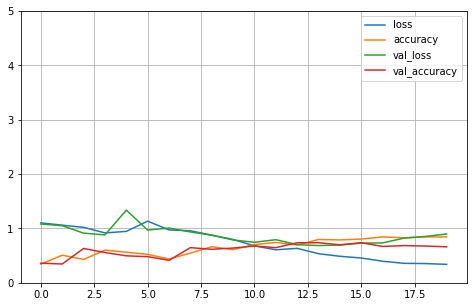

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,5) # set the vertical range to [0-1]

plt.show()

**DATA AUGEMENTATION**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,  horizontal_flip=True)

it_gen = datagen.flow(train_images, train_labels)

steps = int(train_images.shape[0] / batch_size)

**MODEL**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import  Conv2D, Dense, Flatten, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential

model = Sequential([
                    Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = (150,150,3) ),
                    MaxPool2D(2),
                    Conv2D(32, 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(2),
                    Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(2),
                    Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(2),
                    Conv2D(128, 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(2),
                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(3, activation = 'softmax')
])

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer = optimizers.Adam(1e-3), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit( it_gen, epochs = 100, steps_per_epoch= steps, callbacks = [early_stopping_cb], validation_data = (valid_images, valid_labels), verbose = 2)

Epoch 1/100
1/1 - 0s - loss: 1.0957 - accuracy: 0.4375 - val_loss: 1.1674 - val_accuracy: 0.3308
Epoch 2/100
1/1 - 0s - loss: 1.1587 - accuracy: 0.3438 - val_loss: 1.1067 - val_accuracy: 0.3308
Epoch 3/100
1/1 - 0s - loss: 1.0877 - accuracy: 0.4062 - val_loss: 1.0985 - val_accuracy: 0.3308
Epoch 4/100
1/1 - 0s - loss: 1.1058 - accuracy: 0.2188 - val_loss: 1.0974 - val_accuracy: 0.3383
Epoch 5/100
1/1 - 0s - loss: 1.0888 - accuracy: 0.3438 - val_loss: 1.0990 - val_accuracy: 0.3383
Epoch 6/100
1/1 - 0s - loss: 1.1132 - accuracy: 0.2500 - val_loss: 1.0964 - val_accuracy: 0.3383
Epoch 7/100
1/1 - 0s - loss: 1.0976 - accuracy: 0.3438 - val_loss: 1.0944 - val_accuracy: 0.3383
Epoch 8/100
1/1 - 0s - loss: 1.0923 - accuracy: 0.4062 - val_loss: 1.0934 - val_accuracy: 0.3383
Epoch 9/100
1/1 - 0s - loss: 1.0967 - accuracy: 0.2500 - val_loss: 1.0925 - val_accuracy: 0.4135
Epoch 10/100
1/1 - 0s - loss: 1.0863 - accuracy: 0.5312 - val_loss: 1.0922 - val_accuracy: 0.5263
Epoch 11/100
1/1 - 0s - loss:

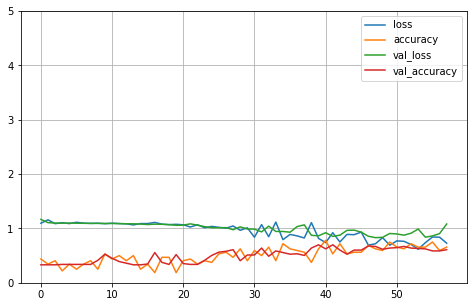

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,5) # set the vertical range to [0-1]

plt.show()

**DROPOUT**

In [ ]:
model = Sequential([
                    Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = (150,150,3) ),
                    MaxPool2D(2),
                    Dropout(0.2),
                    Conv2D(32, 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(2),
                    Dropout(0.2),
                    Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(2),
                    Dropout(0.2),
                    Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(2),
                    Dropout(0.2),
                    Conv2D(128, 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(2),
                    Dropout(0.2),
                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dropout(0.2),
                    Dense(3, activation = 'softmax')
])

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer = optimizers.Adam(1e-3), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_images, train_labels,callbacks = [early_stopping_cb], epochs = 100, validation_data = (valid_images, valid_labels), verbose = 2)

Epoch 1/100
4/4 - 0s - loss: 1.2248 - accuracy: 0.2969 - val_loss: 1.0990 - val_accuracy: 0.3308
Epoch 2/100
4/4 - 0s - loss: 1.1131 - accuracy: 0.2891 - val_loss: 1.0981 - val_accuracy: 0.3308
Epoch 3/100
4/4 - 0s - loss: 1.0980 - accuracy: 0.3516 - val_loss: 1.0974 - val_accuracy: 0.3308
Epoch 4/100
4/4 - 0s - loss: 1.0929 - accuracy: 0.4062 - val_loss: 1.0965 - val_accuracy: 0.3308
Epoch 5/100
4/4 - 0s - loss: 1.0858 - accuracy: 0.3516 - val_loss: 1.0950 - val_accuracy: 0.3308
Epoch 6/100
4/4 - 0s - loss: 1.0835 - accuracy: 0.3516 - val_loss: 1.0905 - val_accuracy: 0.3308
Epoch 7/100
4/4 - 0s - loss: 1.0703 - accuracy: 0.3516 - val_loss: 1.0866 - val_accuracy: 0.3910
Epoch 8/100
4/4 - 0s - loss: 1.0480 - accuracy: 0.3672 - val_loss: 1.0679 - val_accuracy: 0.4135
Epoch 9/100
4/4 - 0s - loss: 1.0308 - accuracy: 0.4219 - val_loss: 1.0592 - val_accuracy: 0.5414
Epoch 10/100
4/4 - 0s - loss: 0.9794 - accuracy: 0.5234 - val_loss: 1.0032 - val_accuracy: 0.5113
Epoch 11/100
4/4 - 0s - loss:

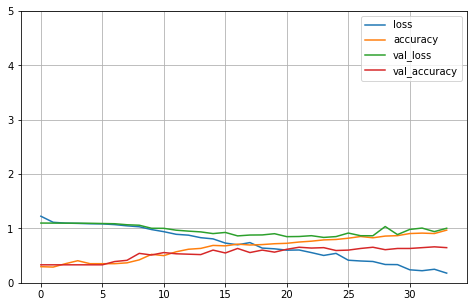

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,5) # set the vertical range to [0-1]

plt.show()

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [ ]:

class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

** DATA WITH DROPOUT**

In [ ]:
model = Sequential([
                    Conv2D(64, 3, padding = 'same', kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01), activation = 'relu', input_shape = (150,150,3) ),
                    MaxPool2D(2),
                    Conv2D(64, 3, padding = 'same', kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01),  activation = 'relu'),
                    MaxPool2D(2),
                    Conv2D(128, 3, padding = 'same', kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01),  activation = 'relu'),
                    MaxPool2D(2),
                    Conv2D(128, 3, padding = 'same', kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01),  activation = 'relu'),
                    MaxPool2D(2),
                    Conv2D(128, 3, padding = 'same', kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01),  activation = 'relu'),
                    MaxPool2D(2),
                    Flatten(),
                    Dense(128, activation = 'relu',  kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01), ),
                    Dropout(0.5),
                    Dense(3, activation = 'softmax')
])

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer = optimizers.Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit( it_gen, epochs = 100, steps_per_epoch= steps, callbacks=[early_stopping_cb], validation_data = (valid_images, valid_labels), verbose = 2)

Epoch 1/100
1/1 - 0s - loss: 14.2782 - accuracy: 0.3125 - val_loss: 13.9016 - val_accuracy: 0.3083
Epoch 2/100
1/1 - 0s - loss: 14.0307 - accuracy: 0.2812 - val_loss: 13.8734 - val_accuracy: 0.3534
Epoch 3/100
1/1 - 0s - loss: 14.0133 - accuracy: 0.3438 - val_loss: 13.8617 - val_accuracy: 0.4135
Epoch 4/100
1/1 - 0s - loss: 13.9521 - accuracy: 0.3438 - val_loss: 13.8239 - val_accuracy: 0.4662
Epoch 5/100
1/1 - 0s - loss: 13.9266 - accuracy: 0.3750 - val_loss: 13.7702 - val_accuracy: 0.4887
Epoch 6/100
1/1 - 0s - loss: 14.0525 - accuracy: 0.2188 - val_loss: 13.7199 - val_accuracy: 0.4511
Epoch 7/100
1/1 - 0s - loss: 13.7167 - accuracy: 0.4062 - val_loss: 13.6774 - val_accuracy: 0.5038
Epoch 8/100
1/1 - 0s - loss: 13.7815 - accuracy: 0.5000 - val_loss: 13.6437 - val_accuracy: 0.5113
Epoch 9/100
1/1 - 0s - loss: 13.8616 - accuracy: 0.2812 - val_loss: 13.6203 - val_accuracy: 0.4962
Epoch 10/100
1/1 - 0s - loss: 13.6388 - accuracy: 0.4375 - val_loss: 13.5896 - val_accuracy: 0.5038
Epoch 11/

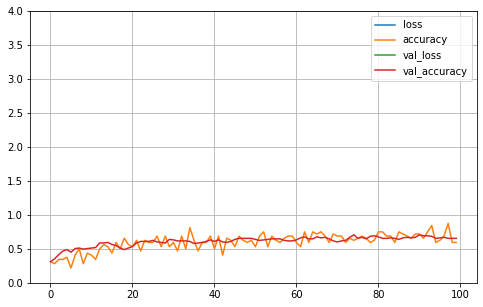

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,4) # set the vertical range to [0-1]

plt.show()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 18, 18, 128)      

In [ ]:
pip install keras-tuner

     |████████████████████████████████| 61kB 4.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=c7b6daf5afc79aaab173129a00592819cdf7034c788698a8e4f36ee22ac571f3
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=60f7161449defd2a60fe0a5277f31737f3abea3af056a91f366829b21ba7afe2
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
INPUT_SHAPE = (150, 150, 3)
NUM_CLASSES = 3

In [ ]:
from kerastuner import HyperModel


class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        model.add(
            Conv2D(
                filters=32,
                kernel_size=3,
                activation='relu',
                input_shape=self.input_shape
            )
        )
        model.add(MaxPooling2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_0',
                min_value=0.0,
                max_value=0.5,
                default=0.2,
                step=0.05,
            ))
        )
        model.add(
            Conv2D(
                filters=32,
                activation='relu',
                kernel_size=3
            )
        )
        model.add(MaxPooling2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.5,
                default=0.2,
                step=0.05,
            ))
        )
        model.add(
            Conv2D(
                filters=64,
                kernel_size=3,
                activation='relu'
            )
        )
        model.add(MaxPooling2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.5,
                default=0.2,
                step=0.05,
            ))
        )
        model.add(
            Conv2D(
                filters=64,
                kernel_size=3,
                activation='relu'
            )
        )
        model.add(MaxPooling2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_3',
                min_value=0.0,
                max_value=0.5,
                default=0.2,
                step=0.05,
            ))
        )
        model.add(
            Conv2D(
                filters=hp.Choice(
                    'num_filters',
                    values=[32, 256],
                    default=256,
                ),
                activation='relu',
                kernel_size=3
            )
        )
        model.add(MaxPooling2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_4',
                min_value=0.0,
                max_value=0.5,
                default=0.2,
                step=0.05,
            ))
        )
        model.add(Flatten())
        model.add(
            Dense(
                units=hp.Int(
                    'units',
                    min_value=32,
                    max_value=512,
                    step=32,
                    default=128
                ),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'
                )
            )
        )
        model.add(
            Dropout(
                rate=hp.Float(
                    'dropout_5',
                    min_value=0.0,
                    max_value=0.5,
                    default=0.2,
                    step=0.05
                )
            )
        )
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = CNNHyperModel(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import  Conv2D, Dense, Flatten, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D
)

In [ ]:
from kerastuner.tuners import RandomSearch

NUM_CLASSES = 3  # cifar10 number of classes
INPUT_SHAPE = (150, 150, 3)  # cifar10 images input shape
SEED = 1
HYPERBAND_MAX_EPOCHS = 40
MAX_TRIALS = 40
EXECUTION_PER_TRIAL = 2

hypermodel = CNNHyperModel(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    seed=SEED,
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='random_search',
    project_name='beans'
)

In [ ]:
tuner.search_space_summary()

In [ ]:

N_EPOCH_SEARCH = 40

tuner.search(train_images, train_labels, epochs=N_EPOCH_SEARCH, validation_data=(valid_images, valid_labels), callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/40
4/4 [==============================] - 0s 112ms/step - loss: 1.2211 - accuracy: 0.3047 - val_loss: 1.0985 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0977 - accuracy: 0.3516 - val_loss: 1.0974 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 38ms/step - loss: 1.0906 - accuracy: 0.3516 - val_loss: 1.0960 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0882 - accuracy: 0.3516 - val_loss: 1.0913 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 43ms/step - loss: 1.0588 - accuracy: 0.3516 - val_loss: 1.0878 - val_accuracy: 0.3459
Epoch 6/40
4/4 [==============================] - 0s 42ms/step - loss: 1.0530 - accuracy: 0.3594 - val_loss: 1.0763 - val_accuracy: 0.3835
Epoch 7/40
4/4 [==============================] - 0s 44ms/step - loss: 1.0497 - accuracy: 0.3906 - val_loss: 1.0902 - val_accuracy: 0.5038
Epoch 8/40
4/4 [==========

Epoch 1/40
4/4 [==============================] - 0s 71ms/step - loss: 1.3863 - accuracy: 0.3750 - val_loss: 1.0993 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0979 - accuracy: 0.3594 - val_loss: 1.0987 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1018 - accuracy: 0.3516 - val_loss: 1.0987 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0924 - accuracy: 0.3516 - val_loss: 1.0957 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 41ms/step - loss: 1.1332 - accuracy: 0.3516 - val_loss: 1.0974 - val_accuracy: 0.3383
Epoch 6/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0950 - accuracy: 0.3516 - val_loss: 1.0997 - val_accuracy: 0.3383
Epoch 7/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1012 - accuracy: 0.3359 - val_loss: 1.1003 - val_accuracy: 0.3383
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.1916 - accuracy: 0.3125 - val_loss: 1.0983 - val_accuracy: 0.3383
Epoch 2/40
4/4 [==============================] - 0s 38ms/step - loss: 1.1103 - accuracy: 0.3438 - val_loss: 1.0980 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 39ms/step - loss: 1.0984 - accuracy: 0.3203 - val_loss: 1.0984 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 43ms/step - loss: 1.0902 - accuracy: 0.3516 - val_loss: 1.0973 - val_accuracy: 0.4135
Epoch 5/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0836 - accuracy: 0.3516 - val_loss: 1.0949 - val_accuracy: 0.3910
Epoch 6/40
4/4 [==============================] - 0s 44ms/step - loss: 1.0788 - accuracy: 0.3594 - val_loss: 1.0937 - val_accuracy: 0.4887
Epoch 7/40
4/4 [==============================] - 0s 43ms/step - loss: 1.0737 - accuracy: 0.3516 - val_loss: 1.0886 - val_accuracy: 0.5113
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.1492 - accuracy: 0.3672 - val_loss: 1.1010 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 43ms/step - loss: 1.1372 - accuracy: 0.3594 - val_loss: 1.0995 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0749 - accuracy: 0.3984 - val_loss: 1.1047 - val_accuracy: 0.3383
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1218 - accuracy: 0.3828 - val_loss: 1.0901 - val_accuracy: 0.3383
Epoch 5/40
4/4 [==============================] - 0s 46ms/step - loss: 1.0878 - accuracy: 0.3984 - val_loss: 1.0662 - val_accuracy: 0.4737
Epoch 6/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0469 - accuracy: 0.3984 - val_loss: 1.0584 - val_accuracy: 0.4135
Epoch 7/40
4/4 [==============================] - 0s 44ms/step - loss: 1.0267 - accuracy: 0.4531 - val_loss: 0.9936 - val_accuracy: 0.5789
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 71ms/step - loss: 1.1240 - accuracy: 0.3672 - val_loss: 1.1019 - val_accuracy: 0.3383
Epoch 2/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1247 - accuracy: 0.2734 - val_loss: 1.1097 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 42ms/step - loss: 1.0936 - accuracy: 0.4141 - val_loss: 1.0980 - val_accuracy: 0.3684
Epoch 4/40
4/4 [==============================] - 0s 38ms/step - loss: 1.0961 - accuracy: 0.3672 - val_loss: 1.0940 - val_accuracy: 0.3383
Epoch 5/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0676 - accuracy: 0.4141 - val_loss: 1.1002 - val_accuracy: 0.3383
Epoch 6/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0606 - accuracy: 0.4766 - val_loss: 1.0878 - val_accuracy: 0.3383
Epoch 7/40
4/4 [==============================] - 0s 34ms/step - loss: 1.0640 - accuracy: 0.4219 - val_loss: 1.0877 - val_accuracy: 0.3383
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 69ms/step - loss: 1.1908 - accuracy: 0.3281 - val_loss: 1.1785 - val_accuracy: 0.3383
Epoch 2/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1370 - accuracy: 0.3906 - val_loss: 1.1581 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 34ms/step - loss: 1.1291 - accuracy: 0.3438 - val_loss: 1.1523 - val_accuracy: 0.3383
Epoch 4/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1061 - accuracy: 0.3828 - val_loss: 1.1551 - val_accuracy: 0.3383
Epoch 5/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1101 - accuracy: 0.3672 - val_loss: 1.1574 - val_accuracy: 0.3383
Epoch 6/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1095 - accuracy: 0.3828 - val_loss: 1.1583 - val_accuracy: 0.3383
Epoch 7/40
4/4 [==============================] - 0s 34ms/step - loss: 1.1208 - accuracy: 0.3828 - val_loss: 1.1562 - val_accuracy: 0.3383
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.9406 - accuracy: 0.3438 - val_loss: 1.2702 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 42ms/step - loss: 1.3024 - accuracy: 0.2500 - val_loss: 1.1643 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 34ms/step - loss: 1.2960 - accuracy: 0.2969 - val_loss: 1.1338 - val_accuracy: 0.3383
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.2044 - accuracy: 0.3594 - val_loss: 1.1045 - val_accuracy: 0.3383
Epoch 5/40
4/4 [==============================] - 0s 35ms/step - loss: 1.2023 - accuracy: 0.2969 - val_loss: 1.1029 - val_accuracy: 0.3308
Epoch 6/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1831 - accuracy: 0.2891 - val_loss: 1.1164 - val_accuracy: 0.3308
Epoch 7/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1637 - accuracy: 0.3125 - val_loss: 1.1040 - val_accuracy: 0.3308
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 75ms/step - loss: 1.1176 - accuracy: 0.2969 - val_loss: 1.0984 - val_accuracy: 0.3534
Epoch 2/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0979 - accuracy: 0.3750 - val_loss: 1.0973 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0986 - accuracy: 0.3516 - val_loss: 1.0957 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0885 - accuracy: 0.3672 - val_loss: 1.0943 - val_accuracy: 0.3459
Epoch 5/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0831 - accuracy: 0.3984 - val_loss: 1.0914 - val_accuracy: 0.3459
Epoch 6/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0763 - accuracy: 0.3516 - val_loss: 1.0854 - val_accuracy: 0.3534
Epoch 7/40
4/4 [==============================] - 0s 44ms/step - loss: 1.0687 - accuracy: 0.3906 - val_loss: 1.0718 - val_accuracy: 0.5038
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 69ms/step - loss: 1.1966 - accuracy: 0.2812 - val_loss: 1.0964 - val_accuracy: 0.4060
Epoch 2/40
4/4 [==============================] - 0s 34ms/step - loss: 1.1228 - accuracy: 0.3594 - val_loss: 1.0945 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 34ms/step - loss: 1.0874 - accuracy: 0.4297 - val_loss: 1.0925 - val_accuracy: 0.3383
Epoch 4/40
4/4 [==============================] - 0s 39ms/step - loss: 1.1032 - accuracy: 0.3281 - val_loss: 1.0888 - val_accuracy: 0.5714
Epoch 5/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1100 - accuracy: 0.3594 - val_loss: 1.0863 - val_accuracy: 0.3684
Epoch 6/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0743 - accuracy: 0.4219 - val_loss: 1.0854 - val_accuracy: 0.3835
Epoch 7/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0748 - accuracy: 0.4219 - val_loss: 1.0823 - val_accuracy: 0.4511
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 67ms/step - loss: 1.0941 - accuracy: 0.3750 - val_loss: 1.0966 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0981 - accuracy: 0.3672 - val_loss: 1.0962 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0995 - accuracy: 0.3594 - val_loss: 1.0954 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0786 - accuracy: 0.3750 - val_loss: 1.0955 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 41ms/step - loss: 1.0990 - accuracy: 0.3359 - val_loss: 1.0947 - val_accuracy: 0.3534
Epoch 6/40
4/4 [==============================] - 0s 41ms/step - loss: 1.1052 - accuracy: 0.2891 - val_loss: 1.0937 - val_accuracy: 0.3910
Epoch 7/40
4/4 [==============================] - 0s 41ms/step - loss: 1.0848 - accuracy: 0.3672 - val_loss: 1.0926 - val_accuracy: 0.4361
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 70ms/step - loss: 2.1501 - accuracy: 0.3359 - val_loss: 1.0988 - val_accuracy: 0.3383
Epoch 2/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1044 - accuracy: 0.2891 - val_loss: 1.0997 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0981 - accuracy: 0.2734 - val_loss: 1.1003 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0998 - accuracy: 0.3672 - val_loss: 1.1003 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0974 - accuracy: 0.3359 - val_loss: 1.1003 - val_accuracy: 0.3308
Epoch 6/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0984 - accuracy: 0.3594 - val_loss: 1.0997 - val_accuracy: 0.3308
Epoch 7/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0975 - accuracy: 0.3359 - val_loss: 1.1001 - val_accuracy: 0.3308
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 70ms/step - loss: 1.1757 - accuracy: 0.4141 - val_loss: 1.1281 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 36ms/step - loss: 1.2719 - accuracy: 0.3516 - val_loss: 1.1379 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.2185 - accuracy: 0.4062 - val_loss: 1.1203 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1923 - accuracy: 0.3203 - val_loss: 1.1025 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1995 - accuracy: 0.2578 - val_loss: 1.0859 - val_accuracy: 0.3158
Epoch 6/40
4/4 [==============================] - 0s 43ms/step - loss: 1.2835 - accuracy: 0.2969 - val_loss: 1.0846 - val_accuracy: 0.3684
Epoch 7/40
4/4 [==============================] - 0s 34ms/step - loss: 1.1960 - accuracy: 0.3438 - val_loss: 1.0879 - val_accuracy: 0.3684
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 69ms/step - loss: 1.1019 - accuracy: 0.3672 - val_loss: 1.0972 - val_accuracy: 0.3383
Epoch 2/40
4/4 [==============================] - 0s 42ms/step - loss: 1.0949 - accuracy: 0.3750 - val_loss: 1.0995 - val_accuracy: 0.3459
Epoch 3/40
4/4 [==============================] - 0s 43ms/step - loss: 1.0685 - accuracy: 0.3516 - val_loss: 1.0929 - val_accuracy: 0.4662
Epoch 4/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0905 - accuracy: 0.3516 - val_loss: 1.0914 - val_accuracy: 0.4586
Epoch 5/40
4/4 [==============================] - 0s 45ms/step - loss: 1.1386 - accuracy: 0.3438 - val_loss: 1.0906 - val_accuracy: 0.4812
Epoch 6/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0961 - accuracy: 0.4062 - val_loss: 1.0879 - val_accuracy: 0.4737
Epoch 7/40
4/4 [==============================] - 0s 38ms/step - loss: 1.0743 - accuracy: 0.4062 - val_loss: 1.0869 - val_accuracy: 0.4436
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 83ms/step - loss: 1.3941 - accuracy: 0.3281 - val_loss: 1.0990 - val_accuracy: 0.3383
Epoch 2/40
4/4 [==============================] - 0s 38ms/step - loss: 1.0987 - accuracy: 0.3359 - val_loss: 1.0982 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 38ms/step - loss: 1.0950 - accuracy: 0.3359 - val_loss: 1.0949 - val_accuracy: 0.3383
Epoch 4/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1040 - accuracy: 0.3359 - val_loss: 1.0983 - val_accuracy: 0.3383
Epoch 5/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0956 - accuracy: 0.3281 - val_loss: 1.0961 - val_accuracy: 0.3383
Epoch 6/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0851 - accuracy: 0.3281 - val_loss: 1.0892 - val_accuracy: 0.3383
Epoch 7/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0709 - accuracy: 0.3281 - val_loss: 1.0775 - val_accuracy: 0.3083
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 76ms/step - loss: 4.6470 - accuracy: 0.2734 - val_loss: 1.0996 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 44ms/step - loss: 1.0993 - accuracy: 0.3281 - val_loss: 1.1021 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1123 - accuracy: 0.3359 - val_loss: 1.1060 - val_accuracy: 0.3383
Epoch 4/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1005 - accuracy: 0.2969 - val_loss: 1.1040 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1022 - accuracy: 0.3281 - val_loss: 1.1000 - val_accuracy: 0.3308
Epoch 6/40
4/4 [==============================] - 0s 38ms/step - loss: 1.0983 - accuracy: 0.3594 - val_loss: 1.0988 - val_accuracy: 0.3383
Epoch 7/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0980 - accuracy: 0.3672 - val_loss: 1.0987 - val_accuracy: 0.3308
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 75ms/step - loss: 1.4062 - accuracy: 0.3516 - val_loss: 1.4104 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 38ms/step - loss: 1.1726 - accuracy: 0.3438 - val_loss: 1.3298 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 38ms/step - loss: 1.2196 - accuracy: 0.2891 - val_loss: 1.3111 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1448 - accuracy: 0.3516 - val_loss: 1.3328 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1453 - accuracy: 0.3906 - val_loss: 1.3537 - val_accuracy: 0.3308
Epoch 6/40
4/4 [==============================] - 0s 38ms/step - loss: 1.1543 - accuracy: 0.3750 - val_loss: 1.3515 - val_accuracy: 0.3308
Epoch 7/40
4/4 [==============================] - 0s 38ms/step - loss: 1.1223 - accuracy: 0.4062 - val_loss: 1.3336 - val_accuracy: 0.3308
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.1763 - accuracy: 0.3125 - val_loss: 1.1040 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 44ms/step - loss: 1.1295 - accuracy: 0.3359 - val_loss: 1.1128 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1073 - accuracy: 0.3750 - val_loss: 1.1018 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1429 - accuracy: 0.3203 - val_loss: 1.0994 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 38ms/step - loss: 1.1478 - accuracy: 0.2656 - val_loss: 1.0984 - val_accuracy: 0.3308
Epoch 6/40
4/4 [==============================] - 0s 38ms/step - loss: 1.1273 - accuracy: 0.3438 - val_loss: 1.0938 - val_accuracy: 0.3308
Epoch 7/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1529 - accuracy: 0.3125 - val_loss: 1.0991 - val_accuracy: 0.3383
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 74ms/step - loss: 1.1495 - accuracy: 0.2891 - val_loss: 1.0990 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 38ms/step - loss: 1.1058 - accuracy: 0.3750 - val_loss: 1.0989 - val_accuracy: 0.2030
Epoch 3/40
4/4 [==============================] - 0s 48ms/step - loss: 1.1029 - accuracy: 0.2734 - val_loss: 1.0985 - val_accuracy: 0.3459
Epoch 4/40
4/4 [==============================] - 0s 50ms/step - loss: 1.1058 - accuracy: 0.2734 - val_loss: 1.0981 - val_accuracy: 0.3985
Epoch 5/40
4/4 [==============================] - 0s 39ms/step - loss: 1.0919 - accuracy: 0.3750 - val_loss: 1.0975 - val_accuracy: 0.3383
Epoch 6/40
4/4 [==============================] - 0s 40ms/step - loss: 1.0989 - accuracy: 0.3906 - val_loss: 1.0968 - val_accuracy: 0.3759
Epoch 7/40
4/4 [==============================] - 0s 47ms/step - loss: 1.0977 - accuracy: 0.3672 - val_loss: 1.0963 - val_accuracy: 0.4511
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 71ms/step - loss: 1.2820 - accuracy: 0.3281 - val_loss: 1.2191 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 37ms/step - loss: 1.2178 - accuracy: 0.3438 - val_loss: 1.1784 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1596 - accuracy: 0.3750 - val_loss: 1.1447 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1116 - accuracy: 0.3750 - val_loss: 1.1281 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1929 - accuracy: 0.3125 - val_loss: 1.1199 - val_accuracy: 0.3308
Epoch 6/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1778 - accuracy: 0.3438 - val_loss: 1.1183 - val_accuracy: 0.3308
Epoch 7/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1718 - accuracy: 0.4141 - val_loss: 1.1194 - val_accuracy: 0.3308
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 75ms/step - loss: 1.1323 - accuracy: 0.3047 - val_loss: 1.0982 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 38ms/step - loss: 1.0992 - accuracy: 0.3438 - val_loss: 1.0980 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 38ms/step - loss: 1.1091 - accuracy: 0.3594 - val_loss: 1.0976 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 47ms/step - loss: 1.0700 - accuracy: 0.4375 - val_loss: 1.0972 - val_accuracy: 0.3383
Epoch 5/40
4/4 [==============================] - 0s 46ms/step - loss: 1.0751 - accuracy: 0.4531 - val_loss: 1.0965 - val_accuracy: 0.3759
Epoch 6/40
4/4 [==============================] - 0s 49ms/step - loss: 1.1040 - accuracy: 0.3672 - val_loss: 1.0961 - val_accuracy: 0.3985
Epoch 7/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1162 - accuracy: 0.3203 - val_loss: 1.0957 - val_accuracy: 0.3910
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.1877 - accuracy: 0.3828 - val_loss: 1.1100 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1801 - accuracy: 0.3516 - val_loss: 1.0971 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 44ms/step - loss: 1.0825 - accuracy: 0.3672 - val_loss: 1.0981 - val_accuracy: 0.3383
Epoch 4/40
4/4 [==============================] - 0s 39ms/step - loss: 1.0926 - accuracy: 0.3359 - val_loss: 1.0978 - val_accuracy: 0.3383
Epoch 5/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0976 - accuracy: 0.3516 - val_loss: 1.0976 - val_accuracy: 0.3383
Epoch 6/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0956 - accuracy: 0.3438 - val_loss: 1.0971 - val_accuracy: 0.3383
Epoch 7/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0882 - accuracy: 0.3672 - val_loss: 1.0944 - val_accuracy: 0.3383
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 73ms/step - loss: 1.2631 - accuracy: 0.3203 - val_loss: 1.0997 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 43ms/step - loss: 1.1037 - accuracy: 0.3047 - val_loss: 1.0983 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1077 - accuracy: 0.3203 - val_loss: 1.0982 - val_accuracy: 0.3383
Epoch 4/40
4/4 [==============================] - 0s 44ms/step - loss: 1.0947 - accuracy: 0.3906 - val_loss: 1.0978 - val_accuracy: 0.3684
Epoch 5/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0929 - accuracy: 0.3359 - val_loss: 1.0940 - val_accuracy: 0.3459
Epoch 6/40
4/4 [==============================] - 0s 43ms/step - loss: 1.0774 - accuracy: 0.3750 - val_loss: 1.0771 - val_accuracy: 0.3835
Epoch 7/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0490 - accuracy: 0.4297 - val_loss: 1.0378 - val_accuracy: 0.3835
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.4451 - accuracy: 0.3594 - val_loss: 1.1140 - val_accuracy: 0.3158
Epoch 2/40
4/4 [==============================] - 0s 43ms/step - loss: 1.2775 - accuracy: 0.3281 - val_loss: 1.2032 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1881 - accuracy: 0.3594 - val_loss: 1.1079 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 42ms/step - loss: 1.1542 - accuracy: 0.2891 - val_loss: 1.1205 - val_accuracy: 0.3383
Epoch 5/40
4/4 [==============================] - 0s 37ms/step - loss: 1.2290 - accuracy: 0.3281 - val_loss: 1.1058 - val_accuracy: 0.3383
Epoch 6/40
4/4 [==============================] - 0s 43ms/step - loss: 1.1870 - accuracy: 0.2812 - val_loss: 1.0918 - val_accuracy: 0.3985
Epoch 7/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1722 - accuracy: 0.3203 - val_loss: 1.1258 - val_accuracy: 0.3383
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 75ms/step - loss: 3.1281 - accuracy: 0.2891 - val_loss: 1.1006 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1127 - accuracy: 0.2344 - val_loss: 1.1021 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 38ms/step - loss: 1.1006 - accuracy: 0.3516 - val_loss: 1.1009 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1001 - accuracy: 0.3516 - val_loss: 1.1004 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0974 - accuracy: 0.3516 - val_loss: 1.1003 - val_accuracy: 0.3308
Epoch 6/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1005 - accuracy: 0.3516 - val_loss: 1.1003 - val_accuracy: 0.3308
Epoch 7/40
4/4 [==============================] - 0s 47ms/step - loss: 1.0973 - accuracy: 0.2500 - val_loss: 1.1003 - val_accuracy: 0.3383
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.2537 - accuracy: 0.3750 - val_loss: 1.1001 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1801 - accuracy: 0.3281 - val_loss: 1.0986 - val_accuracy: 0.3083
Epoch 3/40
4/4 [==============================] - 0s 43ms/step - loss: 1.1761 - accuracy: 0.3047 - val_loss: 1.0979 - val_accuracy: 0.3383
Epoch 4/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1161 - accuracy: 0.2812 - val_loss: 1.0979 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 41ms/step - loss: 1.1005 - accuracy: 0.3359 - val_loss: 1.0972 - val_accuracy: 0.5038
Epoch 6/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0907 - accuracy: 0.3516 - val_loss: 1.0969 - val_accuracy: 0.3910
Epoch 7/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1003 - accuracy: 0.2812 - val_loss: 1.0962 - val_accuracy: 0.3759
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 71ms/step - loss: 1.1660 - accuracy: 0.3125 - val_loss: 1.1590 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 39ms/step - loss: 1.1258 - accuracy: 0.3516 - val_loss: 1.1373 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 42ms/step - loss: 1.1038 - accuracy: 0.3047 - val_loss: 1.1259 - val_accuracy: 0.4436
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1180 - accuracy: 0.3047 - val_loss: 1.1239 - val_accuracy: 0.3383
Epoch 5/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0989 - accuracy: 0.3203 - val_loss: 1.1233 - val_accuracy: 0.3383
Epoch 6/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0908 - accuracy: 0.3984 - val_loss: 1.1233 - val_accuracy: 0.3383
Epoch 7/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0976 - accuracy: 0.3359 - val_loss: 1.1234 - val_accuracy: 0.3383
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 74ms/step - loss: 1.3786 - accuracy: 0.3438 - val_loss: 1.1342 - val_accuracy: 0.3383
Epoch 2/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1242 - accuracy: 0.3516 - val_loss: 1.0968 - val_accuracy: 0.3008
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1155 - accuracy: 0.3750 - val_loss: 1.1001 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0940 - accuracy: 0.3750 - val_loss: 1.0967 - val_accuracy: 0.3383
Epoch 5/40
4/4 [==============================] - 0s 45ms/step - loss: 1.0825 - accuracy: 0.3594 - val_loss: 1.0878 - val_accuracy: 0.4135
Epoch 6/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0769 - accuracy: 0.4297 - val_loss: 1.0878 - val_accuracy: 0.3684
Epoch 7/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0842 - accuracy: 0.3750 - val_loss: 1.1451 - val_accuracy: 0.3383
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 73ms/step - loss: 1.1141 - accuracy: 0.3594 - val_loss: 1.0988 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 42ms/step - loss: 1.1026 - accuracy: 0.3672 - val_loss: 1.0985 - val_accuracy: 0.4436
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0965 - accuracy: 0.3125 - val_loss: 1.0973 - val_accuracy: 0.4286
Epoch 4/40
4/4 [==============================] - 0s 42ms/step - loss: 1.0969 - accuracy: 0.3672 - val_loss: 1.0953 - val_accuracy: 0.5564
Epoch 5/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0869 - accuracy: 0.3594 - val_loss: 1.0948 - val_accuracy: 0.4887
Epoch 6/40
4/4 [==============================] - 0s 38ms/step - loss: 1.0875 - accuracy: 0.3828 - val_loss: 1.0943 - val_accuracy: 0.3534
Epoch 7/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0797 - accuracy: 0.4375 - val_loss: 1.0937 - val_accuracy: 0.3534
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 74ms/step - loss: 1.2646 - accuracy: 0.2422 - val_loss: 1.0976 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 39ms/step - loss: 1.0945 - accuracy: 0.3516 - val_loss: 1.0981 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0897 - accuracy: 0.3516 - val_loss: 1.0944 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 45ms/step - loss: 1.0859 - accuracy: 0.3516 - val_loss: 1.0877 - val_accuracy: 0.3534
Epoch 5/40
4/4 [==============================] - 0s 45ms/step - loss: 1.0690 - accuracy: 0.4297 - val_loss: 1.0820 - val_accuracy: 0.4962
Epoch 6/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0493 - accuracy: 0.4062 - val_loss: 1.0555 - val_accuracy: 0.4586
Epoch 7/40
4/4 [==============================] - 0s 45ms/step - loss: 1.0049 - accuracy: 0.5000 - val_loss: 1.0027 - val_accuracy: 0.5038
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 73ms/step - loss: 1.2101 - accuracy: 0.3438 - val_loss: 1.0973 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 42ms/step - loss: 1.0996 - accuracy: 0.3359 - val_loss: 1.0986 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1002 - accuracy: 0.3359 - val_loss: 1.0986 - val_accuracy: 0.3383
Epoch 4/40
4/4 [==============================] - 0s 39ms/step - loss: 1.0985 - accuracy: 0.2734 - val_loss: 1.0984 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0927 - accuracy: 0.3594 - val_loss: 1.0980 - val_accuracy: 0.3383
Epoch 6/40
4/4 [==============================] - 0s 46ms/step - loss: 1.0873 - accuracy: 0.3516 - val_loss: 1.0954 - val_accuracy: 0.3534
Epoch 7/40
4/4 [==============================] - 0s 44ms/step - loss: 1.0841 - accuracy: 0.3516 - val_loss: 1.0904 - val_accuracy: 0.3985
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.1612 - accuracy: 0.2734 - val_loss: 1.0992 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 35ms/step - loss: 1.0924 - accuracy: 0.3438 - val_loss: 1.0981 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0902 - accuracy: 0.3438 - val_loss: 1.0974 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 42ms/step - loss: 1.0896 - accuracy: 0.3516 - val_loss: 1.0959 - val_accuracy: 0.3684
Epoch 5/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0939 - accuracy: 0.3672 - val_loss: 1.0964 - val_accuracy: 0.3383
Epoch 6/40
4/4 [==============================] - 0s 38ms/step - loss: 1.0897 - accuracy: 0.4453 - val_loss: 1.0944 - val_accuracy: 0.3383
Epoch 7/40
4/4 [==============================] - 0s 43ms/step - loss: 1.0736 - accuracy: 0.4141 - val_loss: 1.0884 - val_accuracy: 0.4286
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.1806 - accuracy: 0.3672 - val_loss: 1.1629 - val_accuracy: 0.3383
Epoch 2/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1549 - accuracy: 0.3047 - val_loss: 1.1696 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1185 - accuracy: 0.3594 - val_loss: 1.1244 - val_accuracy: 0.3383
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1086 - accuracy: 0.3750 - val_loss: 1.1028 - val_accuracy: 0.3383
Epoch 5/40
4/4 [==============================] - 0s 38ms/step - loss: 1.0893 - accuracy: 0.3906 - val_loss: 1.1082 - val_accuracy: 0.3233
Epoch 6/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1023 - accuracy: 0.3516 - val_loss: 1.1116 - val_accuracy: 0.3383
Epoch 7/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0750 - accuracy: 0.4141 - val_loss: 1.0994 - val_accuracy: 0.3383
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 71ms/step - loss: 1.6732 - accuracy: 0.3594 - val_loss: 1.1149 - val_accuracy: 0.3383
Epoch 2/40
4/4 [==============================] - 0s 35ms/step - loss: 1.4303 - accuracy: 0.3281 - val_loss: 1.1728 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.3567 - accuracy: 0.2656 - val_loss: 1.2589 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 38ms/step - loss: 1.2705 - accuracy: 0.3203 - val_loss: 1.1694 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 36ms/step - loss: 1.2722 - accuracy: 0.3359 - val_loss: 1.1023 - val_accuracy: 0.3308
Epoch 6/40
4/4 [==============================] - 0s 35ms/step - loss: 1.2863 - accuracy: 0.2812 - val_loss: 1.1544 - val_accuracy: 0.3308
Epoch 7/40
4/4 [==============================] - 0s 37ms/step - loss: 1.2290 - accuracy: 0.3281 - val_loss: 1.1140 - val_accuracy: 0.3308
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 74ms/step - loss: 1.1192 - accuracy: 0.3203 - val_loss: 1.0980 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1526 - accuracy: 0.3125 - val_loss: 1.0974 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 43ms/step - loss: 1.1005 - accuracy: 0.3906 - val_loss: 1.0947 - val_accuracy: 0.4887
Epoch 4/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0862 - accuracy: 0.3594 - val_loss: 1.0940 - val_accuracy: 0.4135
Epoch 5/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0931 - accuracy: 0.3203 - val_loss: 1.0928 - val_accuracy: 0.4662
Epoch 6/40
4/4 [==============================] - 0s 45ms/step - loss: 1.0768 - accuracy: 0.3516 - val_loss: 1.0918 - val_accuracy: 0.5263
Epoch 7/40
4/4 [==============================] - 0s 43ms/step - loss: 1.0690 - accuracy: 0.4297 - val_loss: 1.0910 - val_accuracy: 0.5564
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 73ms/step - loss: 3.5247 - accuracy: 0.3828 - val_loss: 1.1107 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 43ms/step - loss: 1.1580 - accuracy: 0.2734 - val_loss: 1.1065 - val_accuracy: 0.3383
Epoch 3/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1143 - accuracy: 0.2969 - val_loss: 1.1033 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1003 - accuracy: 0.3359 - val_loss: 1.1003 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0955 - accuracy: 0.3359 - val_loss: 1.0988 - val_accuracy: 0.3308
Epoch 6/40
4/4 [==============================] - 0s 44ms/step - loss: 1.0970 - accuracy: 0.3203 - val_loss: 1.0914 - val_accuracy: 0.3534
Epoch 7/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0901 - accuracy: 0.3359 - val_loss: 1.1034 - val_accuracy: 0.3383
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.2504 - accuracy: 0.2891 - val_loss: 1.0984 - val_accuracy: 0.3383
Epoch 2/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1057 - accuracy: 0.3125 - val_loss: 1.0987 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 42ms/step - loss: 1.0908 - accuracy: 0.3906 - val_loss: 1.0977 - val_accuracy: 0.3684
Epoch 4/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1107 - accuracy: 0.3672 - val_loss: 1.1001 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0937 - accuracy: 0.3750 - val_loss: 1.0992 - val_accuracy: 0.3308
Epoch 6/40
4/4 [==============================] - 0s 43ms/step - loss: 1.0852 - accuracy: 0.3906 - val_loss: 1.0855 - val_accuracy: 0.4737
Epoch 7/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0756 - accuracy: 0.4375 - val_loss: 1.0986 - val_accuracy: 0.3308
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.2570 - accuracy: 0.2812 - val_loss: 1.0977 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 44ms/step - loss: 1.2621 - accuracy: 0.3203 - val_loss: 1.0972 - val_accuracy: 0.3985
Epoch 3/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1138 - accuracy: 0.3672 - val_loss: 1.0977 - val_accuracy: 0.3459
Epoch 4/40
4/4 [==============================] - 0s 37ms/step - loss: 1.2197 - accuracy: 0.2812 - val_loss: 1.0977 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 43ms/step - loss: 1.1304 - accuracy: 0.3203 - val_loss: 1.0970 - val_accuracy: 0.3684
Epoch 6/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1415 - accuracy: 0.3203 - val_loss: 1.0968 - val_accuracy: 0.3684
Epoch 7/40
4/4 [==============================] - 0s 37ms/step - loss: 1.1289 - accuracy: 0.3359 - val_loss: 1.0970 - val_accuracy: 0.3985
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.1494 - accuracy: 0.3359 - val_loss: 1.0992 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1099 - accuracy: 0.3203 - val_loss: 1.1001 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0992 - accuracy: 0.3516 - val_loss: 1.0996 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 35ms/step - loss: 1.1014 - accuracy: 0.3203 - val_loss: 1.0997 - val_accuracy: 0.3308
Epoch 5/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0971 - accuracy: 0.3281 - val_loss: 1.0956 - val_accuracy: 0.3308
Epoch 6/40
4/4 [==============================] - 0s 43ms/step - loss: 1.0949 - accuracy: 0.3516 - val_loss: 1.0919 - val_accuracy: 0.4662
Epoch 7/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0838 - accuracy: 0.3906 - val_loss: 1.0852 - val_accuracy: 0.4361
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 72ms/step - loss: 1.1347 - accuracy: 0.3516 - val_loss: 1.0979 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 36ms/step - loss: 1.1325 - accuracy: 0.3047 - val_loss: 1.0980 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 42ms/step - loss: 1.1078 - accuracy: 0.3203 - val_loss: 1.0970 - val_accuracy: 0.3534
Epoch 4/40
4/4 [==============================] - 0s 42ms/step - loss: 1.1006 - accuracy: 0.3516 - val_loss: 1.0976 - val_accuracy: 0.3759
Epoch 5/40
4/4 [==============================] - 0s 41ms/step - loss: 1.0800 - accuracy: 0.3984 - val_loss: 1.0967 - val_accuracy: 0.4060
Epoch 6/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0976 - accuracy: 0.3750 - val_loss: 1.0928 - val_accuracy: 0.3534
Epoch 7/40
4/4 [==============================] - 0s 43ms/step - loss: 1.0718 - accuracy: 0.3672 - val_loss: 1.0890 - val_accuracy: 0.4887
Epoch 8/40
4/4 [===========

Epoch 1/40
4/4 [==============================] - 0s 73ms/step - loss: 1.1714 - accuracy: 0.3516 - val_loss: 1.0985 - val_accuracy: 0.3308
Epoch 2/40
4/4 [==============================] - 0s 38ms/step - loss: 1.1483 - accuracy: 0.3672 - val_loss: 1.0956 - val_accuracy: 0.3308
Epoch 3/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0870 - accuracy: 0.3828 - val_loss: 1.0971 - val_accuracy: 0.3308
Epoch 4/40
4/4 [==============================] - 0s 44ms/step - loss: 1.1109 - accuracy: 0.2734 - val_loss: 1.0955 - val_accuracy: 0.4962
Epoch 5/40
4/4 [==============================] - 0s 36ms/step - loss: 1.0795 - accuracy: 0.3672 - val_loss: 1.0944 - val_accuracy: 0.4511
Epoch 6/40
4/4 [==============================] - 0s 37ms/step - loss: 1.0756 - accuracy: 0.3984 - val_loss: 1.0924 - val_accuracy: 0.3383
Epoch 7/40
4/4 [==============================] - 0s 38ms/step - loss: 1.0626 - accuracy: 0.4219 - val_loss: 1.0887 - val_accuracy: 0.4060
Epoch 8/40
4/4 [===========

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
# Show a summary of the search
tuner.results_summary()

# Retrieve the best model.
#best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model.
#loss, accuracy = best_model.evaluate(test_images, test_labels)


In [ ]:
data_augmentation = keras.Sequential([
  layers.experimental.preprocessing.RandomFlip('horizontal'),
  layers.experimental.preprocessing.RandomRotation(0.1),
])

In [ ]:
model = Sequential([
                    Conv2D(32, 3, activation = 'relu', input_shape = (150,150,3) ),
                    MaxPool2D(2),
                    Dropout(0.05),
                    Conv2D(32, 3, activation = 'relu'),
                    MaxPool2D(2),
                    Dropout(0.25),
                    Conv2D(64, 3, activation = 'relu'),
                    MaxPool2D(2),
                    Dropout(0.05),
                    Conv2D(64, 3, activation = 'relu'),
                    MaxPool2D(2),
                    Dropout(0.5),
                    Conv2D(32, 3, activation = 'relu'),
                    MaxPool2D(2),
                    Dropout(0.3),
                    Flatten(),
                    Dense(64, activation = 'relu', ),
                    Dropout(0.3),
                    Dense(3, activation = 'softmax')
])

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer = optimizers.Adam(0.0010953574938066576), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit( train_images , train_labels, epochs = 150, steps_per_epoch= steps, callbacks=[early_stopping_cb], validation_data = (valid_images, valid_labels), verbose = 2)

Epoch 1/150
1/1 - 0s - loss: 1.1666 - accuracy: 0.2891 - val_loss: 1.1037 - val_accuracy: 0.3308
Epoch 2/150
1/1 - 0s - loss: 1.1727 - accuracy: 0.3438 - val_loss: 1.1032 - val_accuracy: 0.3308
Epoch 3/150
1/1 - 0s - loss: 1.0951 - accuracy: 0.3594 - val_loss: 1.1008 - val_accuracy: 0.3308
Epoch 4/150
1/1 - 0s - loss: 1.1058 - accuracy: 0.3906 - val_loss: 1.0994 - val_accuracy: 0.3308
Epoch 5/150
1/1 - 0s - loss: 1.0954 - accuracy: 0.3516 - val_loss: 1.0989 - val_accuracy: 0.3308
Epoch 6/150
1/1 - 0s - loss: 1.0974 - accuracy: 0.3906 - val_loss: 1.0989 - val_accuracy: 0.3008
Epoch 7/150
1/1 - 0s - loss: 1.0888 - accuracy: 0.3750 - val_loss: 1.0984 - val_accuracy: 0.3233
Epoch 8/150
1/1 - 0s - loss: 1.0916 - accuracy: 0.4062 - val_loss: 1.0981 - val_accuracy: 0.3383
Epoch 9/150
1/1 - 0s - loss: 1.0966 - accuracy: 0.3438 - val_loss: 1.0979 - val_accuracy: 0.3459
Epoch 10/150
1/1 - 0s - loss: 1.0980 - accuracy: 0.3672 - val_loss: 1.0976 - val_accuracy: 0.3985
Epoch 11/150
1/1 - 0s - loss:

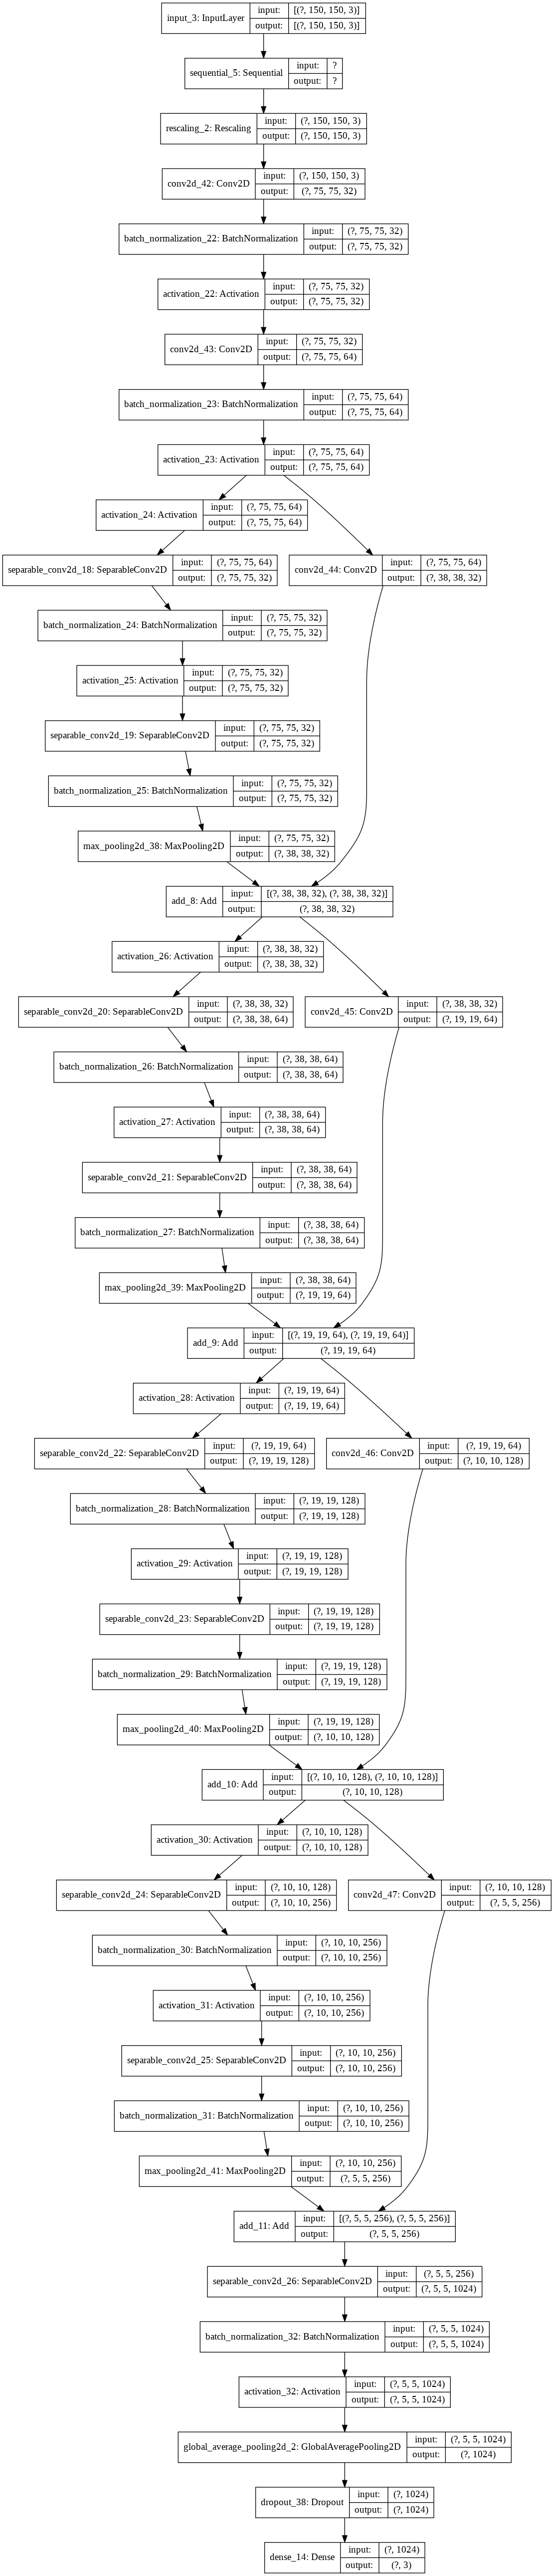

In [ ]:
image_size = (150, 150)

def make_model(input_shape, num_classes):
  inputs = keras.Input(shape=input_shape)
  # Image augmentation block
  x = data_augmentation(inputs)

  # Entry block
  x = layers.experimental.preprocessing.Rescaling(1./255)(x)
  x = layers.Conv2D(32, 3, strides=2, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(64, 3, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  previous_block_activation = x  # Set aside residual
  
  for size in [32,64,128, 256,]:
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(size, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(size, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    # Project residual
    residual = layers.Conv2D(
        size, 1, strides=2, padding='same')(previous_block_activation)
    x = layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

  x = layers.SeparableConv2D(1024, 3, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  
  x = layers.GlobalAveragePooling2D()(x)
  if num_classes == 2:
    activation = 'sigmoid'
    units = 1
  else:
    activation = 'softmax'
    units = num_classes
  
  x = layers.Dropout(0.5)(x)
  outputs = layers.Dense(units, activation=activation)(x)
  return keras.Model(inputs, outputs)

model = make_model(input_shape=image_size + (3,), num_classes=3)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 50  # In practice you will need at least 50 epochs


model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=epochs, callbacks=early_stopping_cb, validation_data=(valid_images, valid_labels))

Epoch 1/50
4/4 [==============================] - 1s 185ms/step - loss: 1.2832 - accuracy: 0.3281 - val_loss: 1.0987 - val_accuracy: 0.3308
Epoch 2/50
4/4 [==============================] - 0s 97ms/step - loss: 1.2663 - accuracy: 0.2500 - val_loss: 1.0986 - val_accuracy: 0.3308
Epoch 3/50
4/4 [==============================] - 0s 95ms/step - loss: 1.2654 - accuracy: 0.3359 - val_loss: 1.0987 - val_accuracy: 0.3308
Epoch 4/50
4/4 [==============================] - 0s 96ms/step - loss: 1.2268 - accuracy: 0.2891 - val_loss: 1.0986 - val_accuracy: 0.3308
Epoch 5/50
4/4 [==============================] - 0s 95ms/step - loss: 1.2146 - accuracy: 0.3828 - val_loss: 1.0986 - val_accuracy: 0.3308
Epoch 6/50
4/4 [==============================] - 0s 98ms/step - loss: 1.2358 - accuracy: 0.4297 - val_loss: 1.0986 - val_accuracy: 0.3308
Epoch 7/50
4/4 [==============================] - 0s 98ms/step - loss: 1.2153 - accuracy: 0.3125 - val_loss: 1.0986 - val_accuracy: 0.3308
Epoch 8/50
4/4 [==========